
<div> <img src="California.jpg" alt="Drawing" style="width: 600px;"/></div> 

# End To End Data Science Project For Beginner


### Introduction 👇
Basic informations about dataset: The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Size:

- number of features (columns): 10

- number of rows: 20640

- The columns names are pretty self explanitory: 👉 longitude, latitude, housing_median_age, total_rooms, total_bed rooms, 
    population, households, median_income, median_house_value, and ocean_proximity.

- Target variable name : median_house_value

### Steps Involved 👇
-  Load the data 
-  Explore the data
-  Clean the data
-  Data Visualization
-  Transform the data
-  Feature scaling
-  Split the data
-  Build the Model
-  Model Evaluation

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### 1) Load the data: ⭐ 

In [2]:
housing = pd.read_csv("D:/Datasets/housing.csv")

In [3]:
df = pd.DataFrame(housing)

Each row represents one district. There are 10 attributes. longitude, latitude, housing_median_age, total_rooms, total_bed rooms, population, households, median_income, median_house_value, and ocean_proximity.

In [4]:
# quick view of loaded data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



##### 2) Explore the data:  ⭐


In [5]:
df.shape

(20640, 10)

In [6]:
columns =housing.columns
print(len((columns)))

10


In [7]:
''' 
The info() method is useful to get a quick description of the data, in particular
the total number of rows, and each column’s data type and number of non-null values
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature.

- All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute

- You probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical feature. You can find out what categories exist and how many districts belong to each category by using the *value_counts()* method:

In [8]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### 3) Clean the data: ⭐

In [12]:
#we will fill the bedroom column with median
med = df["total_bedrooms"].median()
med

435.0

In [13]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(med)

In [14]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### 4) Data Visualization: ⭐

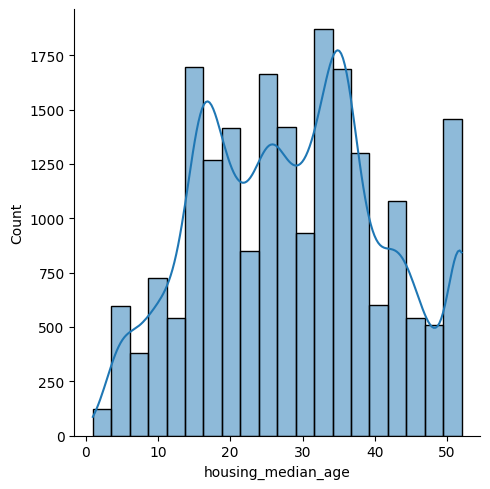

In [15]:
sns.displot(df['housing_median_age'], kde=True, bins=20)

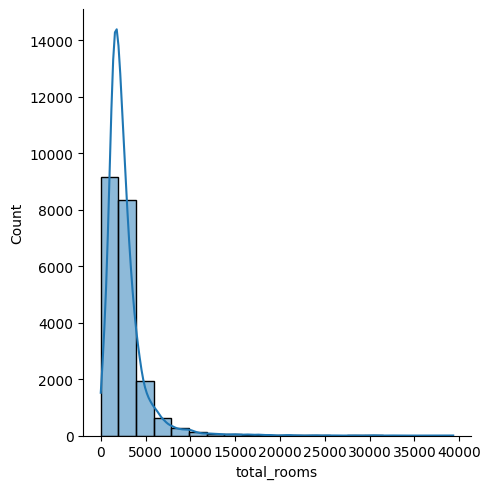

In [16]:
sns.displot(df['total_rooms'], kde=True, bins=20)

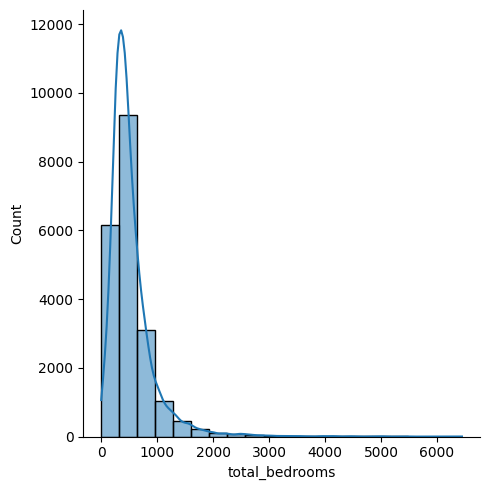

In [17]:
sns.displot(df['total_bedrooms'], kde=True, bins=20)

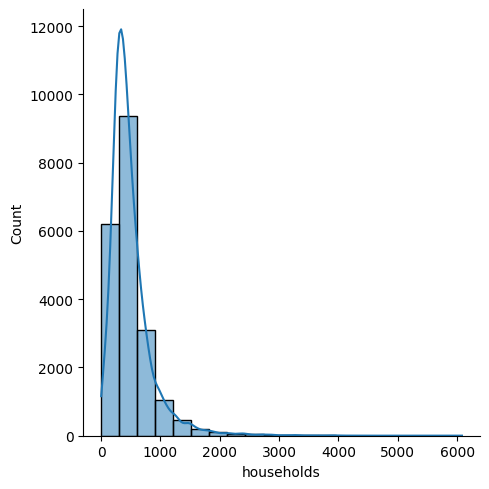

In [18]:
sns.displot(df['households'], kde=True, bins=20)

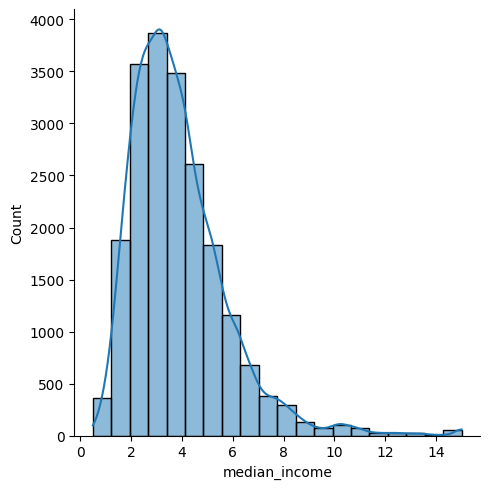

In [19]:
sns.displot(df['median_income'], kde=True, bins=20)

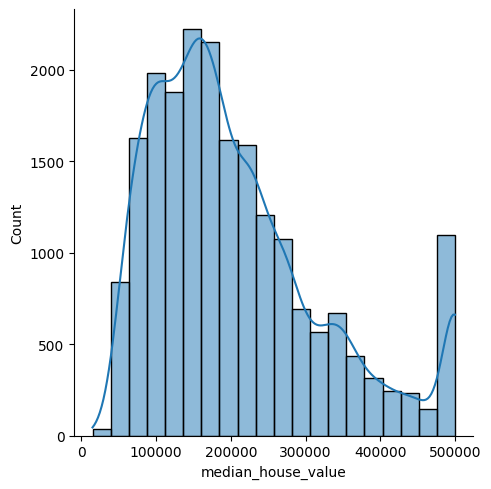

In [20]:
sns.displot(df['median_house_value'], kde=True, bins=20)

<AxesSubplot: xlabel='median_house_value'>

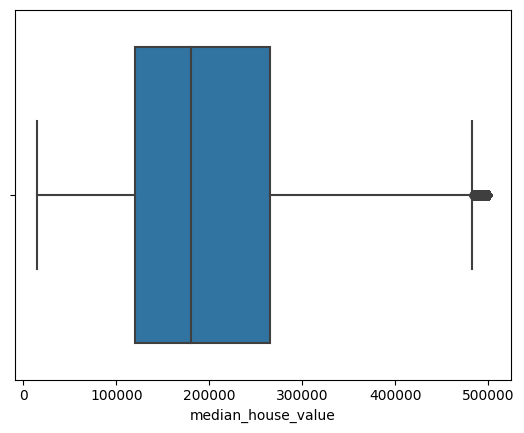

In [21]:
sns.boxplot(x=df['median_house_value'], data=df)

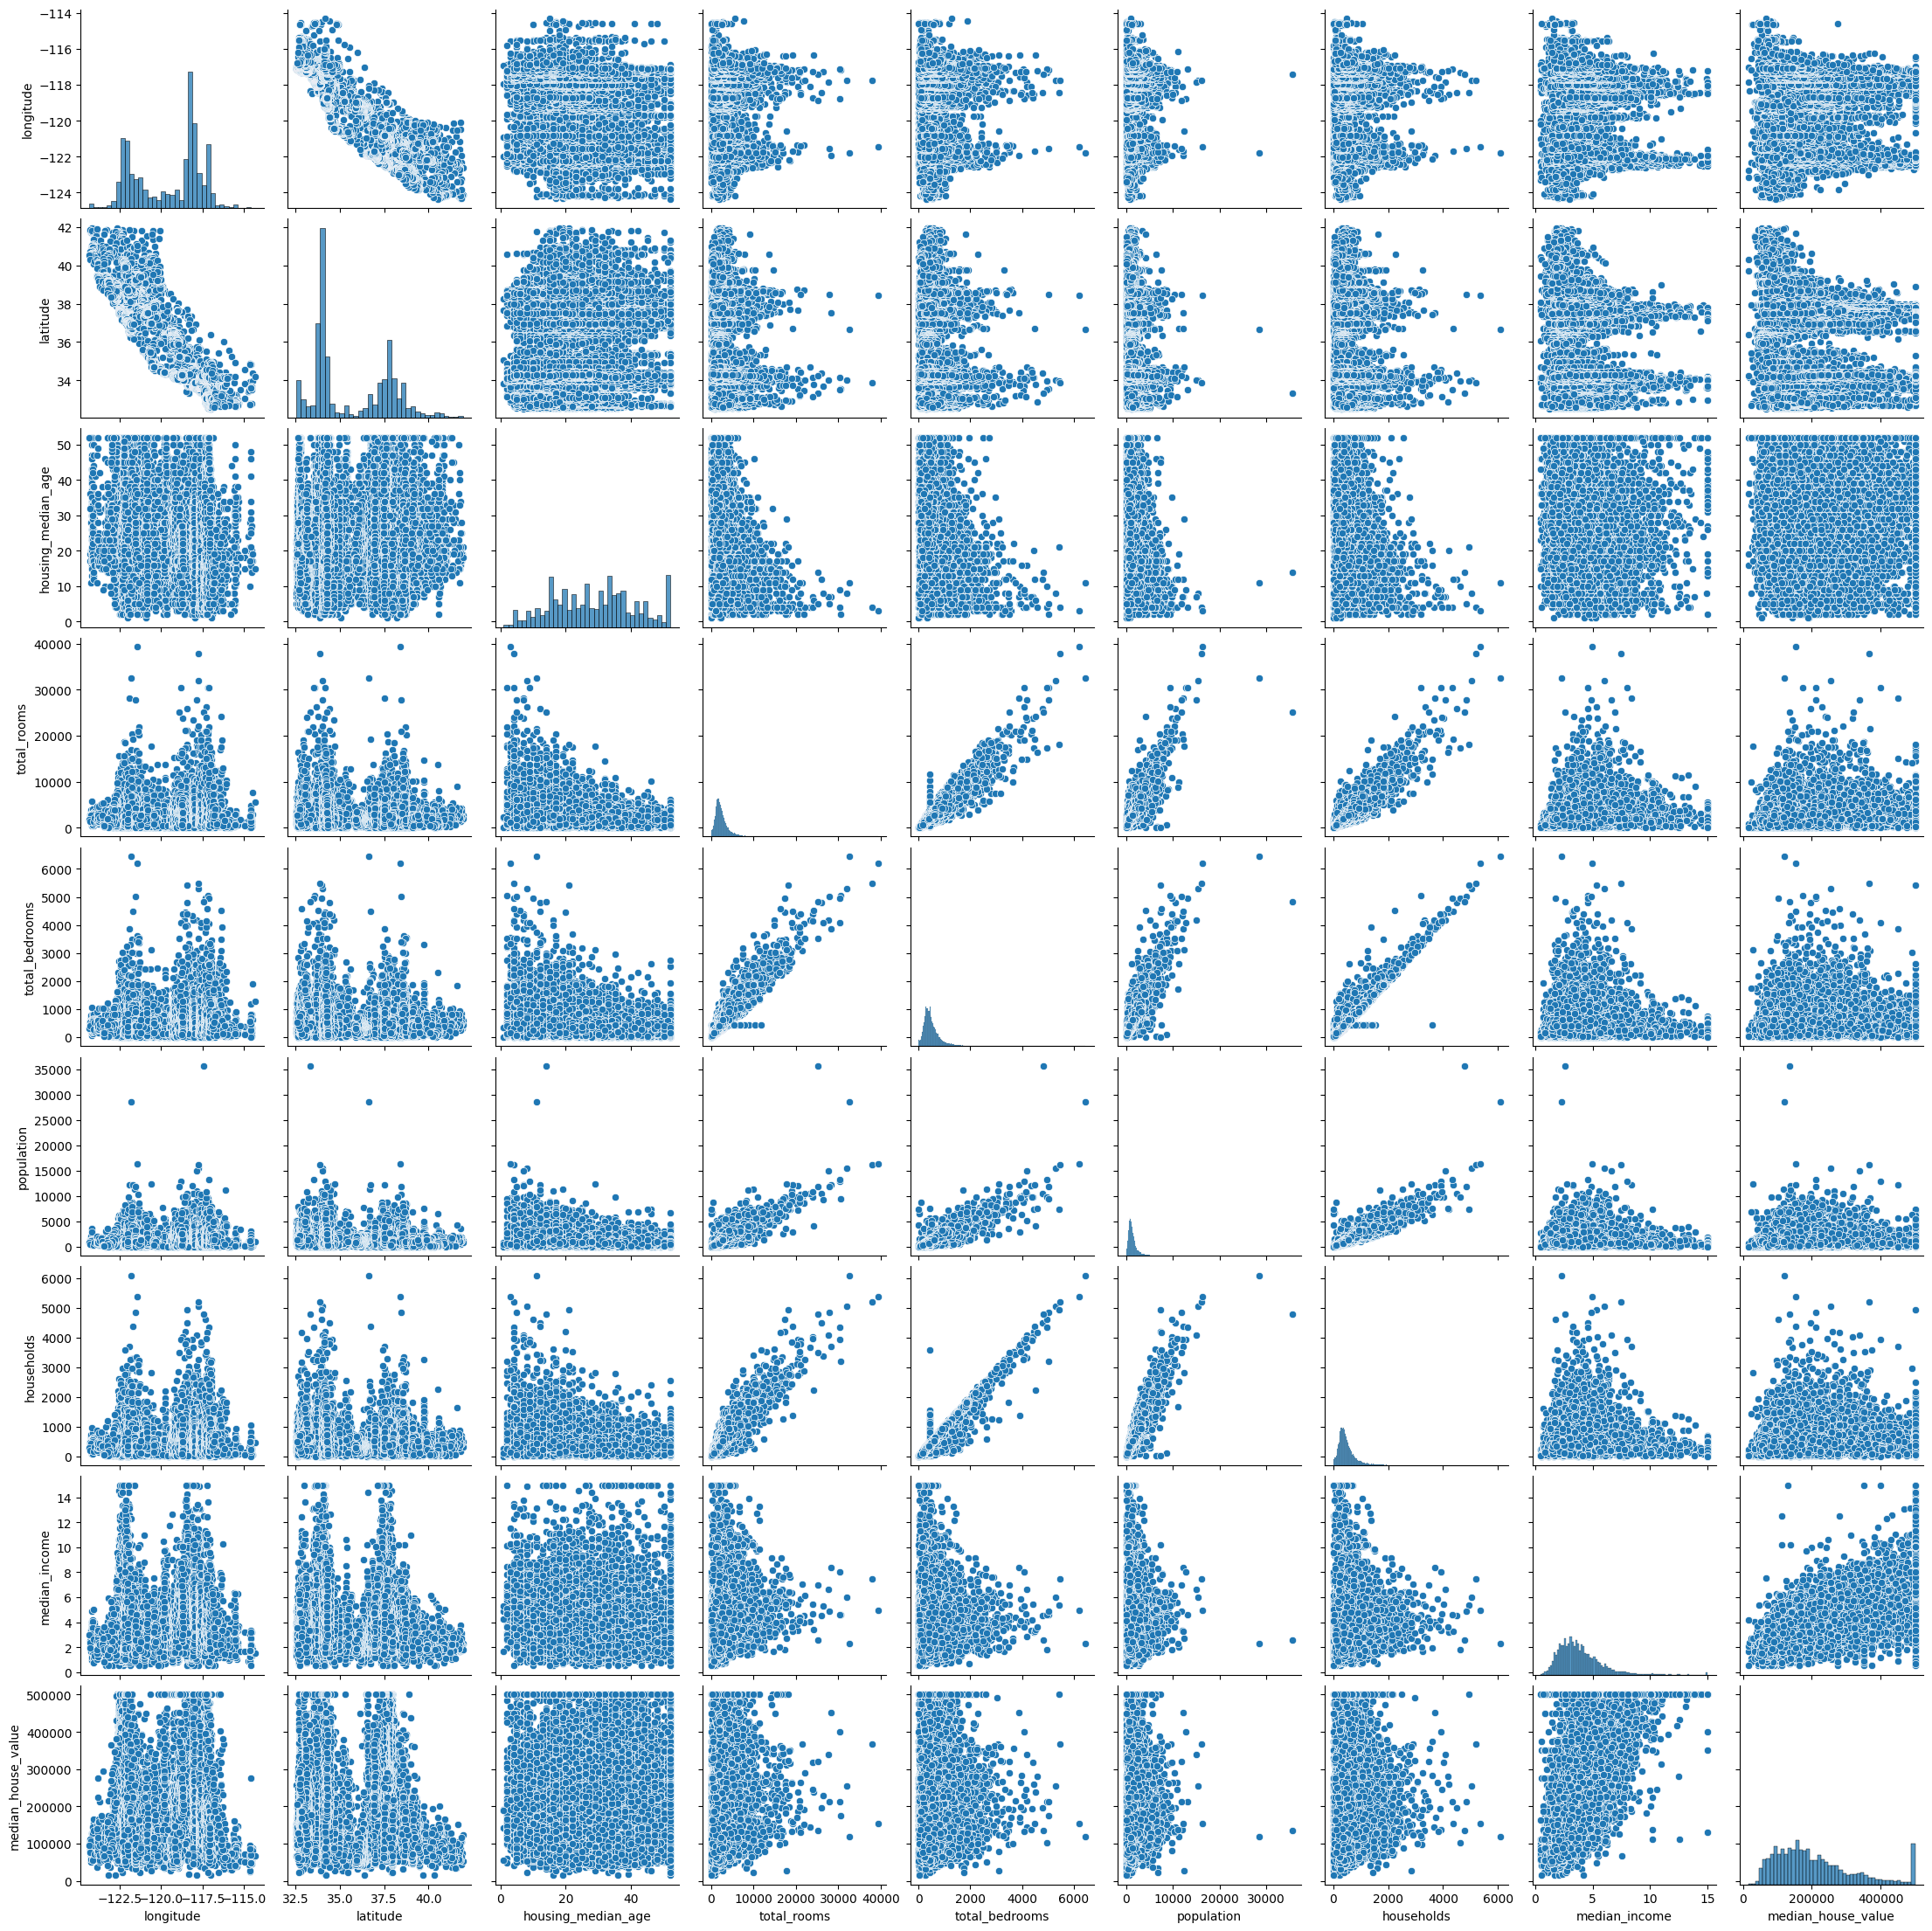

In [22]:
sns.pairplot(df)

<AxesSubplot: xlabel='total_rooms', ylabel='total_bedrooms'>

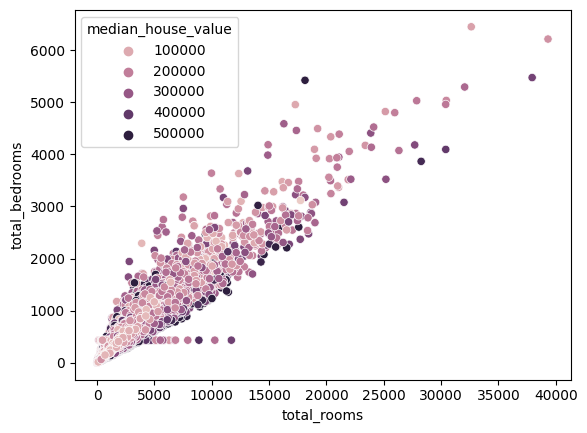

In [23]:
sns.scatterplot(x=df['total_rooms'], y=df['total_bedrooms'], hue=df['median_house_value'])

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

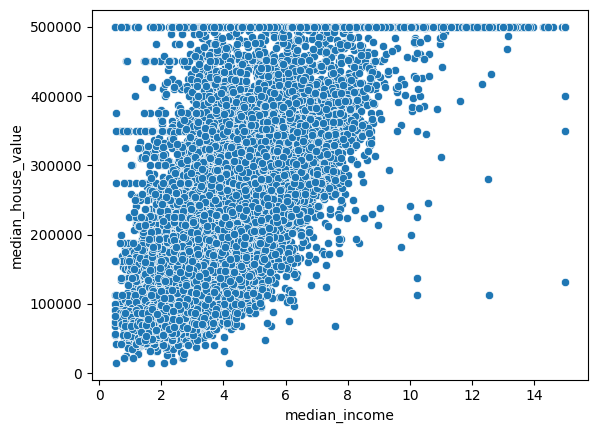

In [24]:
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])

<AxesSubplot: >

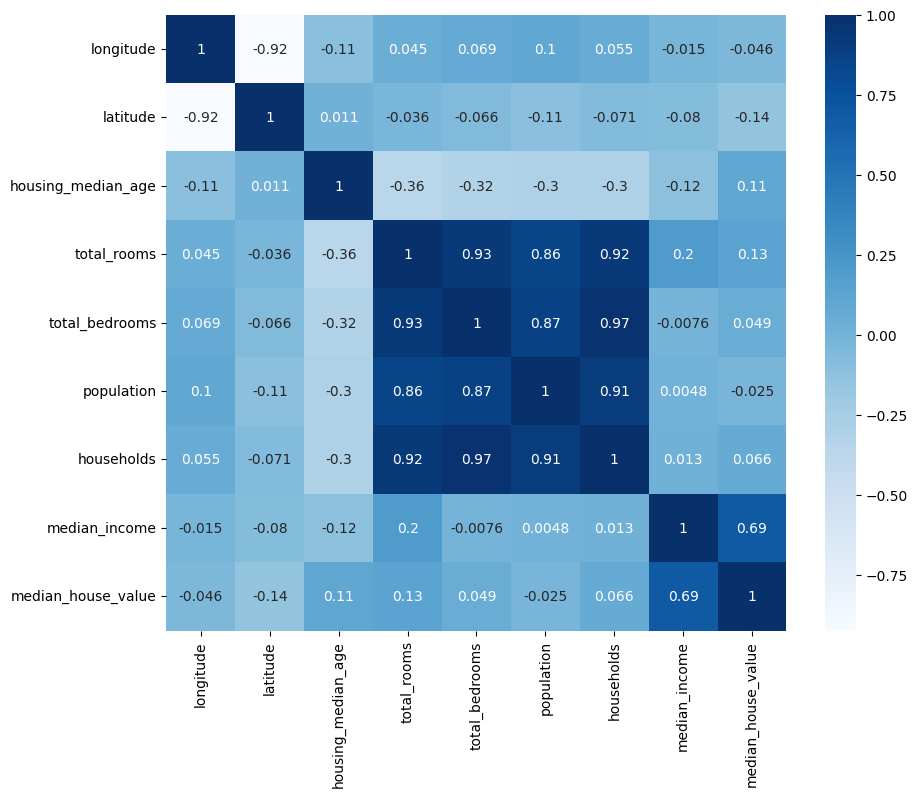

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr( numeric_only = True), annot=True, cmap="Blues")

##### 5) Transform the data: ⭐

In [26]:
#removing the unnecessary columns from the data
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [27]:
df = df.rename(columns = {'housing_median_age':'housing_age'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [28]:
df = df.rename(columns = {'median_house_value': 'housing_value'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,median_income,housing_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [29]:
df = df.rename(columns = {'median_income': 'income'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


- One hot encoding

    It is a technique used to represent categorical variables as numerical data. It creates a new binary column for each unique category in a categorical variable. Each row has a 1 in the column for the category it belongs to, and a 0 in all other columns.

<AxesSubplot: xlabel='ocean_proximity', ylabel='count'>

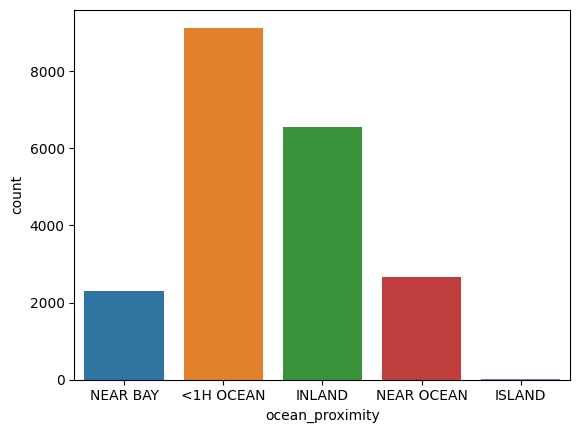

In [30]:
sns.countplot(x=df['ocean_proximity'], data=df)

In [31]:
# ocean_prox =pd.get_dummies(df['ocean_proximity'])
# ocean_prox.head()
# df=pd.concat([df,ocean_prox], axis=1)
# df.drop(['ocean_proximity'],axis=1,inplace = True) 

In [32]:
df = pd.get_dummies(df, drop_first = True, prefix=None)

In [33]:
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [34]:
df.shape

(20640, 11)

In [35]:
df.isnull().sum()

housing_age                   0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
income                        0
housing_value                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


##### 6) Feature scaling: ⭐

In [36]:
#import necessary libraries
from sklearn.preprocessing import StandardScaler

In [37]:
numerical_df = df[['housing_age','total_rooms', 'total_bedrooms', 'population', 'households', 'income','housing_value']]

In [38]:
scaler = StandardScaler()

In [39]:
sc_df = scaler.fit(numerical_df)

In [40]:
scaled_df = sc_df.transform(numerical_df)

In [41]:
new_df_lite = pd.DataFrame(data = scaled_df, columns=numerical_df.columns)

In [42]:
new_df_lite.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693


In [43]:
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [44]:
cat_df = df[['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

In [45]:
new_df = pd.concat([new_df_lite, cat_df], axis=1)
new_df.head()

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0,0,1,0
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0,0,1,0
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0,0,1,0
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0,0,1,0
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0,0,1,0



##### 7) Split the data: ⭐


In [46]:
#import necessary libraries
from sklearn.model_selection import train_test_split

In [47]:
X = new_df.drop('housing_value', axis=1)
y = new_df['housing_value']

In [48]:
X.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0,0,1,0
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0,0,1,0
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0,0,1,0


In [49]:
y.head(3)

0    2.129631
1    1.314156
2    1.258693
Name: housing_value, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=20)

In [51]:
print(X_train.shape)
print(y_train.shape)

(16512, 10)
(16512,)


##### 8) Build the model: ⭐

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
lr_pred = lr.predict(X_test)

In [56]:
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : lr_pred})
df1.head(3)

,Y_test,Y_pred
6111,-0.773495,-0.447601
17742,0.739597,0.644892
79,-0.654771,-0.356519


In [57]:
lr.score(X_train , y_train)

0.6345174740627686

In [58]:
lr.score(X_test, y_test)

0.6287262669667171

##### 8) Model Evaluation: ⭐

In [59]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [60]:
lr_mse = mean_squared_error(y_test , lr_pred)
lr_mae = mean_absolute_error(y_test , lr_pred)
lr_m = mean_absolute_percentage_error(y_test , lr_pred)

In [61]:
print("Mean Square Error: ",lr_mse)

print("Mean Absolute Error: ",lr_mae)

print("Mean Absolute Precentage Error: ",lr_m)

Mean Square Error:  0.3889482944998051
Mean Absolute Error:  0.4444783857121709
Mean Absolute Precentage Error:  2.409450334576282


### Conclusion
In addition to Simple Linear Regression, other options for modeling include Ridge Regression, Lasso Regression, OLS Regression, and RandomForestRegressor. If you wish to explore these alternate models further, feel free to do so. Thank you. 👍    